## Risk Factor Correlation 

Risk factors need to be correlated in the model. I have separately calculated the Spearman coefficients in R, as the NHANES data is stored in R. 

Here, I will be testing for how to pull data from the GBD with the required correlation. To start, I am copying the information found here: https://vivarium-research.readthedocs.io/en/latest/model_design/vivarium_model_components/risk_factors/risk_correlation/index.html#risk-models

In [41]:
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats

In [26]:
rho = 0.254367949
N = 10000 
np.random.seed(12345)

0.23646490102864898

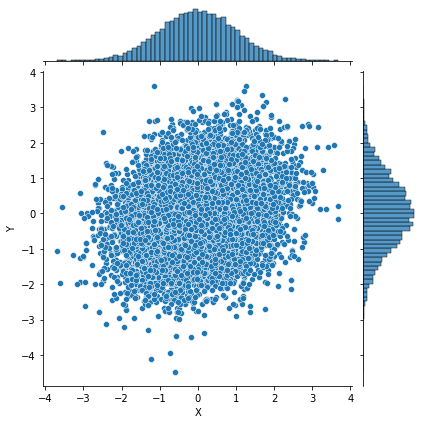

In [27]:
probit_propensity = np.random.multivariate_normal([0,0], [[1, rho],
                                                         [rho, 1]], size=N)
probit_propensity_2 = {'X':probit_propensity[:,0], 'Y':probit_propensity[:,1]}
sns.jointplot(data = probit_propensity_2, x = 'X',y= 'Y')
rho, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,1])
rho

0.23646490102864898

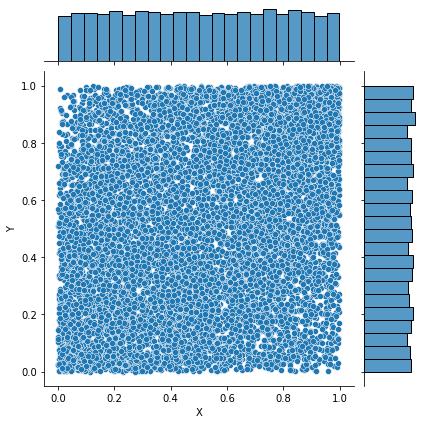

In [29]:
propensity = scipy.stats.norm().cdf(probit_propensity)
propensity_2 = {'X':propensity[:,0], 'Y':propensity[:,1]}
sns.jointplot(data = propensity_2, x = 'X',y= 'Y')
rho, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
rho

### Now I am going to try the above again, but for 3 variables 

In [32]:
sbp_ldl = 0.04702304 
sbp_bmi = 0.254367949 
bmi_ldl = 0.167575606 

In [35]:
probit_propensity = np.random.multivariate_normal([0,0,0], [[1, sbp_ldl, sbp_bmi],
                                                         [sbp_ldl, 1, bmi_ldl],
                                                         [sbp_bmi, bmi_ldl, 1]], size=N)

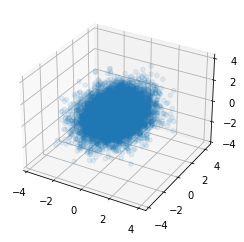

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(probit_propensity[:,0], probit_propensity[:,1], probit_propensity[:,2], marker='o',alpha=0.1)

In [45]:
sbp_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,1], probit_propensity[:,2])
print(sbp_ldl, sbp_bmi, bmi_ldl)

0.039419471410194716 0.2457922714179227 0.16795520068755201


In [46]:
propensity = scipy.stats.norm().cdf(probit_propensity)
sbp_ldl, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,2])
print(sbp_ldl, sbp_bmi, bmi_ldl)

0.039419471410194716 0.2457922714179227 0.16795520068755201


In [47]:
propensity

array([[0.86537187, 0.09839309, 0.88041172],
       [0.65657711, 0.56405621, 0.66905375],
       [0.8221326 , 0.45613196, 0.25250301],
       ...,
       [0.44483928, 0.98785889, 0.46878694],
       [0.31236122, 0.25275499, 0.17560764],
       [0.03475751, 0.40107562, 0.6072768 ]])

## Okay last time but all variables 

Note: the only reason this is separate from the 3 variable one is that 3 variables I could still graph and ensured a proof of concept for expanding

In [49]:
sbp_ldl = 0.04702304 
sbp_bmi = 0.254367949 
bmi_ldl = 0.167575606 
sbp_fpg = 0.29276168 
ldl_fpg = 0.07671241
bmi_fpg = 0.2584241 

In [50]:
probit_propensity = np.random.multivariate_normal([0,0,0,0], [[1, sbp_ldl, sbp_bmi, sbp_fpg],
                                                         [sbp_ldl, 1, bmi_ldl, ldl_fpg],
                                                         [sbp_bmi, bmi_ldl, 1, bmi_fpg],
                                                             [sbp_fpg, ldl_fpg, bmi_fpg, 1]], size=N)

In [51]:
sbp_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(probit_propensity[:,1], probit_propensity[:,2])
sbp_fpg, p_val = scipy.stats.spearmanr(probit_propensity[:,0], probit_propensity[:,3])
ldl_fpg, p_val = scipy.stats.spearmanr(probit_propensity[:,1], probit_propensity[:,3])
bmi_fpg, p_val = scipy.stats.spearmanr(probit_propensity[:,2], probit_propensity[:,3])
print(sbp_ldl, sbp_bmi, bmi_ldl, sbp_fpg, ldl_fpg, bmi_fpg)

0.0477471300454713 0.24899027780990277 0.15884823624448238 0.28198794855587944 0.06370180977701809 0.25909640941096407


In [52]:
propensity = scipy.stats.norm().cdf(probit_propensity)
sbp_ldl, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,1])
sbp_bmi, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,2])
bmi_ldl, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,2])
sbp_fpg, p_val = scipy.stats.spearmanr(propensity[:,0], propensity[:,3])
ldl_fpg, p_val = scipy.stats.spearmanr(propensity[:,1], propensity[:,3])
bmi_fpg, p_val = scipy.stats.spearmanr(propensity[:,2], propensity[:,3])
print(sbp_ldl, sbp_bmi, bmi_ldl, sbp_fpg, ldl_fpg, bmi_fpg)

0.0477471300454713 0.24899027780990277 0.15884823624448238 0.28198794855587944 0.06370180977701809 0.25909640941096407


### Make this into a Function for all Age/Sex Groups 

Note: due to lack of data, we are dropping the highest age groups. There are not enough folks in NHANES to estimate these values. We will use the values for 85-90 for all people 85+

In [60]:
correlation = pd.read_csv('/ihme/homes/lutzes/correlation.csv')
correlation = correlation.drop('Unnamed: 0',axis=1)
correlation = correlation.drop([13,14,28,29],axis=0)
correlation.head()

,sex_id,age_start,age_end,sbp_ldl,sbp_bmi,ldl_bmi,sbp_fpg,ldl_fpg,bmi_fpg
0,1,25,30,0.047023,0.254368,0.167576,0.292762,0.076712,0.258424
1,1,30,35,0.134183,0.291779,0.147717,0.295277,0.113364,0.300470
2,1,35,40,0.109851,0.312886,0.171545,0.238835,0.142454,0.258896
3,1,40,45,0.053608,0.281782,0.084486,0.243066,0.129824,0.328645
4,1,45,50,0.010689,0.215524,0.018309,0.169897,0.024637,0.284058


In [109]:
data_all = pd.DataFrame()
N = 1000 #can change to be the total population size needed 
for i in range(0,len(correlation)):
    sex_id = correlation.iloc[i][0]
    age_start = correlation.iloc[i][1]
    age_end = correlation.iloc[i][2]
    sbp_ldl = correlation.iloc[i][3]
    sbp_bmi = correlation.iloc[i][4]
    bmi_ldl = correlation.iloc[i][5]
    sbp_fpg = correlation.iloc[i][6]
    ldl_fpg = correlation.iloc[i][7]
    bmi_fpg = correlation.iloc[i][8]
    probit_propensity = np.random.multivariate_normal([0,0,0,0], [[1, sbp_ldl, sbp_bmi, sbp_fpg],
                                                         [sbp_ldl, 1, bmi_ldl, ldl_fpg],
                                                         [sbp_bmi, bmi_ldl, 1, bmi_fpg],
                                                             [sbp_fpg, ldl_fpg, bmi_fpg, 1]], size=N)
    propensity = scipy.stats.norm().cdf(probit_propensity)
    data = pd.DataFrame(data = propensity, 
                       columns = ['SBP','LDL','BMI','FPG'])
    data['sex_id'] = sex_id
    data['age_start'] = age_start
    data['age_end'] = age_end
    data_all = data_all.append(data)

/tmp/ipykernel_3644478/3429990979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_3644478/3429990979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_3644478/3429990979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_3644478/3429990979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(data)
/tmp/ipykernel_3644478/3429990979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [110]:
data_all

,SBP,LDL,BMI,FPG,sex_id,age_start,age_end
0,0.681579,0.354120,0.030674,0.870577,1.0,25.0,30.0
1,0.772158,0.464927,0.733973,0.288723,1.0,25.0,30.0
2,0.332461,0.199019,0.543959,0.130799,1.0,25.0,30.0
3,0.918357,0.683665,0.915934,0.374068,1.0,25.0,30.0
4,0.458020,0.738905,0.042778,0.353613,1.0,25.0,30.0
...,...,...,...,...,...,...,...
995,0.732993,0.135386,0.962568,0.741004,2.0,85.0,90.0
996,0.874296,0.835187,0.624806,0.385569,2.0,85.0,90.0
997,0.405619,0.129532,0.828577,0.627677,2.0,85.0,90.0
998,0.397445,0.973242,0.497330,0.671044,2.0,85.0,90.0
